In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
np.random.seed(42)
x = np.random.randint(1, 101, size=20)
print(f"features\n {x}")
m = 1.5

features
 [ 52  93  15  72  61  21  83  87  75  75  88 100  24   3  22  53   2  88
  30  38]


In [4]:
print(len(x))

20


In [5]:
y_ = [0] * 20

for i in range(len(x)):
    np.random.seed(i)
    b = np.random.randint(-25, 25) 
    
    y_[i] = m*x[i] + b
    y_[i] = y_[i].astype(int)

In [6]:
print(f"labels {y_}")

labels [np.int64(97), np.int64(151), np.int64(37), np.int64(125), np.int64(112), np.int64(41), np.int64(109), np.int64(152), np.int64(90), np.int64(115), np.int64(116), np.int64(150), np.int64(22), np.int64(-2), np.int64(51), np.int64(62), np.int64(19), np.int64(154), np.int64(62), np.int64(61)]


In [7]:
y =  list(y_)
print(y)

[np.int64(97), np.int64(151), np.int64(37), np.int64(125), np.int64(112), np.int64(41), np.int64(109), np.int64(152), np.int64(90), np.int64(115), np.int64(116), np.int64(150), np.int64(22), np.int64(-2), np.int64(51), np.int64(62), np.int64(19), np.int64(154), np.int64(62), np.int64(61)]


In [8]:
data = [y , x]
df = pd.DataFrame(data)

In [9]:
df = df.T

In [10]:
df

,0,1
0,97,52
1,151,93
2,37,15
3,125,72
4,112,61
5,41,21
6,109,83
7,152,87
8,90,75
9,115,75


In [11]:
df.rename(columns={0 : "x", 1 : "y"} , inplace=True)

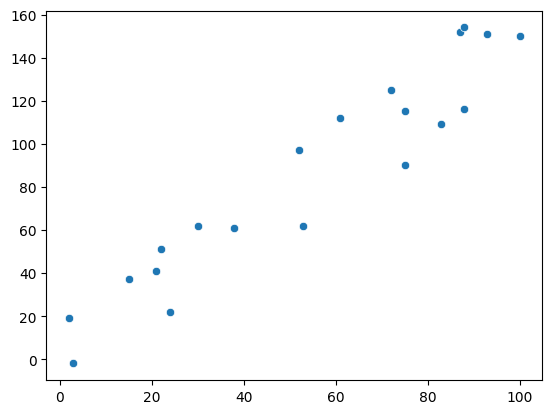

In [12]:
sns.scatterplot(x = x , y = y , data=df);

In [13]:
class linear_regression:
    '''
    writing linear regression for data with single feature (only x)
    m -> weight 
    c -> bais
    alpha -> learning rate
    number_of_iteration -> number of iteration for gradient descent to run
    output -> prediction made by algorithms
    '''
    def __init__(self, alpha = 0.01, number_of_interation = 100):
        self.m = 0 # weight for the linear regression or the slope of the line
        self.c = 0 # baises fot  the linear regression or the intercept
        self.alpha = alpha
        self.number_of_iteration = number_of_interation

    def fit(self, x , y):
            _x = list(x)
            _y = list(y)
            # optimising the weights and baises
            
            for _ in range(self.number_of_iteration):
                __sum__ = 0
                
                # calculating the gradient that sum over all values of (signed error)*the_value for "b"
                for j in range(len(y)):
                    __signed_error__ = (self.m *_x[j] + self.c - _y[j])
                    __sum__ = __sum__ + __signed_error__ * _x[j]
                
                self.m = self.m - self.alpha * __sum__
            
            for _ in range(self.number_of_iteration):
                __sum__ = 0
                # calculating the gradient that sum over all values of (signed error)*the_value for "c"
                for j in range(len(y)):
                    __signed_error__ = (self.m *_x[j] + self.c - _y[j])
                    __sum__ = __sum__ + __signed_error__
                
                self.c = self.c - self.alpha * __sum__
            

    def predict(self , x):
        _x = list(x)
        output = []
        for i in range(len(x)):
            h = self.m * _x[i] + self.c
            output.append(h)
            
        return output
         
         


In [14]:
from sklearn.preprocessing import StandardScaler
x1 = df.iloc[: , 0:2]
scaling_object = StandardScaler()
x2 = scaling_object.fit_transform(x1)

In [ ]:
df1 = pd.DataFrame(x2 , columns=["x" , "y"])

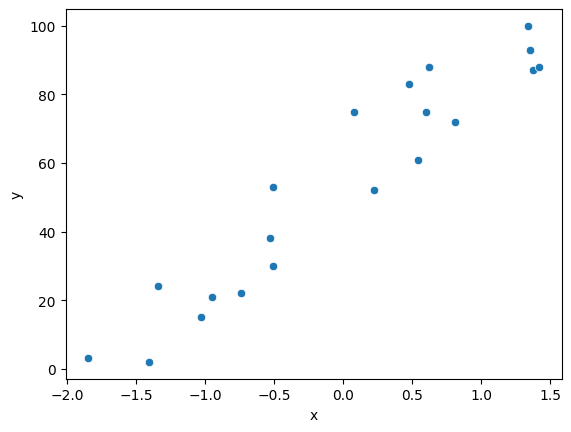

In [16]:
sns.scatterplot(x = df1["x"] , y=df["y"]);


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train , x_test , y_train , y_test = train_test_split(df1['x'] , df1["y"] ,test_size=0.2 , random_state=42)

In [19]:
model = linear_regression(number_of_interation=5000 , alpha=0.09)

In [20]:
model.fit(x_train , y_train)


In [21]:
prediction = model.predict(x_test)

In [22]:
prediction

[0.24334673752325667,
 1.435082785217606,
 -0.48842101106099295,
 1.3723598353389561]

In [23]:
y_test

0    -0.066726
17    1.077146
15   -0.034952
1     1.236017
Name: y, dtype: float64

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions = np.array(prediction)


y_test = np.array(y_test) 

mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")


MSE: 0.11212184375164777
RMSE: 0.3348460000532301
MAE: 0.31445527215149616
R-squared: 0.6951116952160066


In [25]:
m = model.m
c = model.c

In [26]:
y_line = m*df1["x"] + c

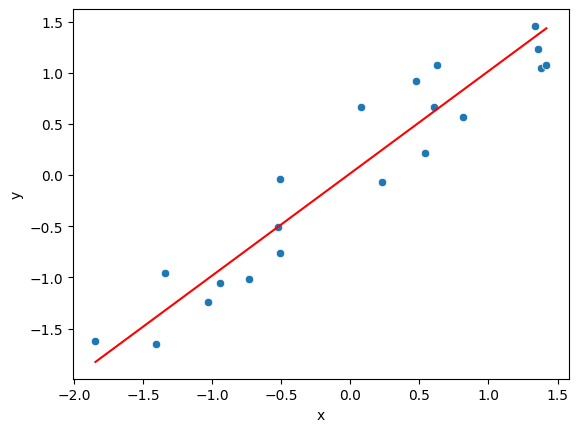

In [27]:
sns.scatterplot(x = df1["x"], y=df1["y"])
sns.lineplot(x = df1["x"] , y = y_line , color ="red");